In [1]:
%matplotlib inline

3D Earth and Celestial Bodies {#planets_example}
=============================

Plot the solar system in PyVista using datasets from the
`~pyvista.examples.planets`{.interpreted-text role="mod"} module.

This example is inspired by
[planet3D-MATLAB](https://github.com/tamaskis/planet3D-MATLAB).

::: {.note}
::: {.title}
Note
:::

The purpose of this example is to demonstrate plotting celestial bodies
and may lack astronomical precision. There may be inaccuracies in the
representation, so please take care when reusing or repurposing this
example.

Please take a look at libraries like [astropy](https://www.astropy.org/)
if you wish to use Python for astronomical calculations.
:::


In [3]:
from __future__ import annotations

import pyvista
from pyvista import examples
import numpy as np
np.bool = np.bool_



Plot the Solar System with Stars in the Background
==================================================

This section relies on calculations in [Visualizing Celestial Bodies in
3D](https://tamaskis.github.io/files/Visualizing_Celestial_Bodies_in_3D.pdf).


/opt/anaconda3/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:56: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


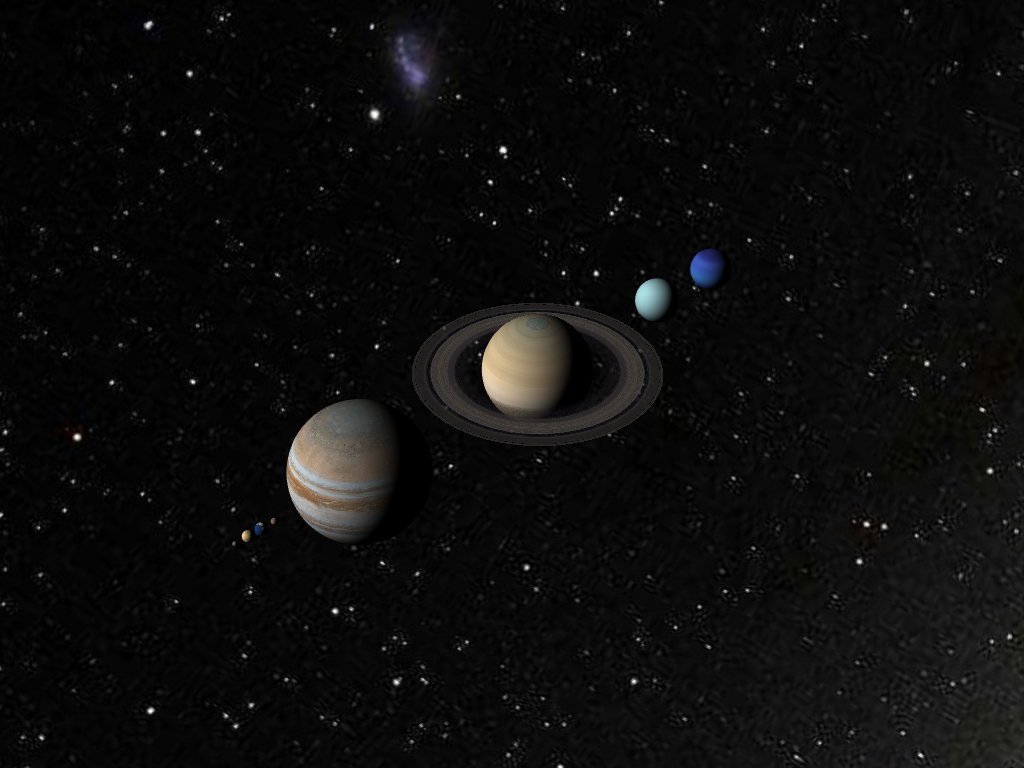

In [4]:
# Light of the Sun.
light = pyvista.Light()
light.set_direction_angle(30, -20)

# Load planets
mercury = examples.planets.load_mercury(radius=2439.0)
mercury_texture = examples.planets.download_mercury_surface(texture=True)
venus = examples.planets.load_venus(radius=6052.0)
venus_texture = examples.planets.download_venus_surface(texture=True)
earth = examples.planets.load_earth(radius=6378.1)
earth_texture = examples.load_globe_texture()
mars = examples.planets.load_mars(radius=3397.2)
mars_texture = examples.planets.download_mars_surface(texture=True)
jupiter = examples.planets.load_jupiter(radius=71492.0)
jupiter_texture = examples.planets.download_jupiter_surface(texture=True)
saturn = examples.planets.load_saturn(radius=60268.0)
saturn_texture = examples.planets.download_saturn_surface(texture=True)
# Saturn's rings range from 7000.0 km to 80000.0 km from the surface of the planet
inner = 60268.0 + 7000.0
outer = 60268.0 + 80000.0
saturn_rings = examples.planets.load_saturn_rings(inner=inner, outer=outer, c_res=50)
saturn_rings_texture = examples.planets.download_saturn_rings(texture=True)
uranus = examples.planets.load_uranus(radius=25559.0)
uranus_texture = examples.planets.download_uranus_surface(texture=True)
neptune = examples.planets.load_neptune(radius=24764.0)
neptune_texture = examples.planets.download_neptune_surface(texture=True)
pluto = examples.planets.load_pluto(radius=1151.0)
pluto_texture = examples.planets.download_pluto_surface(texture=True)

# Move planets to a nice position for the plotter. These numbers are not
# grounded in reality and are for demonstration purposes only.
mercury.translate((0.0, 0.0, 0.0), inplace=True)
venus.translate((-15000.0, 0.0, 0.0), inplace=True)
earth.translate((-30000.0, 0.0, 0.0), inplace=True)
mars.translate((-45000.0, 0.0, 0.0), inplace=True)
jupiter.translate((-150000.0, 0.0, 0.0), inplace=True)
saturn.translate((-400000.0, 0.0, 0.0), inplace=True)
saturn_rings.translate((-400000.0, 0.0, 0.0), inplace=True)
uranus.translate((-600000.0, 0.0, 0.0), inplace=True)
neptune.translate((-700000.0, 0.0, 0.0), inplace=True)

# Add planets to Plotter.
pl = pyvista.Plotter(lighting='none')
cubemap = examples.download_cubemap_space_4k()
_ = pl.add_actor(cubemap.to_skybox())
pl.set_environment_texture(cubemap, is_srgb=True, resample=1 / 64)
pl.add_light(light)
pl.add_mesh(mercury, texture=mercury_texture, smooth_shading=True)
pl.add_mesh(venus, texture=venus_texture, smooth_shading=True)
pl.add_mesh(earth, texture=earth_texture, smooth_shading=True)
pl.add_mesh(mars, texture=mars_texture, smooth_shading=True)
pl.add_mesh(jupiter, texture=jupiter_texture, smooth_shading=True)
pl.add_mesh(saturn, texture=saturn_texture, smooth_shading=True)
pl.add_mesh(saturn_rings, texture=saturn_rings_texture, smooth_shading=True)
pl.add_mesh(uranus, texture=uranus_texture, smooth_shading=True)
pl.add_mesh(neptune, texture=neptune_texture, smooth_shading=True)
pl.add_mesh(pluto, texture=pluto_texture, smooth_shading=True)
pl.show()

Plot the Planets and their Textures
===================================

Each planet here is in a different subplot. The planet\'s textures are
from [Solar Textures](https://www.solarsystemscope.com/textures/).


/opt/anaconda3/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:56: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


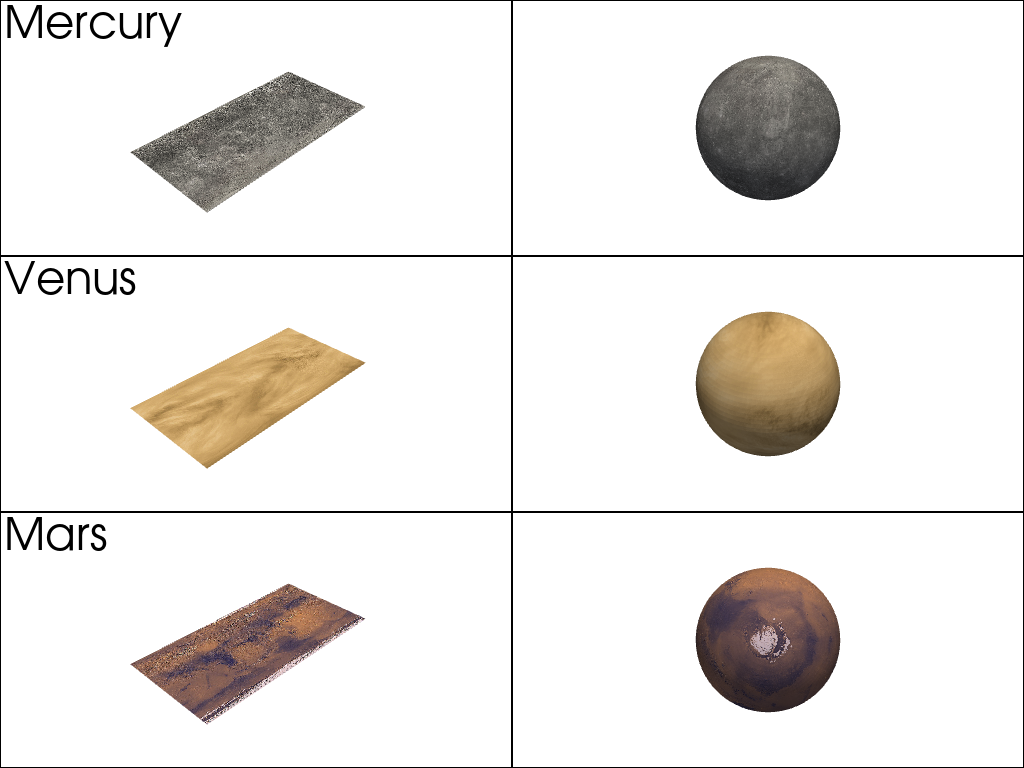

In [5]:
pl = pyvista.Plotter(shape=(3, 2))
pl.subplot(0, 0)
pl.add_text('Mercury')
pl.add_mesh(examples.planets.download_mercury_surface(), rgb=True)
pl.subplot(0, 1)
pl.add_mesh(mercury, texture=mercury_texture)
pl.subplot(1, 0)
pl.add_text('Venus')
pl.add_mesh(examples.planets.download_venus_surface(atmosphere=True), rgb=True)
pl.subplot(1, 1)
pl.add_mesh(venus, texture=venus_texture)
pl.subplot(2, 0)
pl.add_text('Mars')
pl.add_mesh(examples.planets.download_mars_surface(), rgb=True)
pl.subplot(2, 1)
pl.add_mesh(mars, texture=mars_texture)
pl.show(cpos='xy')

Plot the Atmosphere and Surface of Venus
========================================

Here we plot Venus with and without its atmosphere.


/opt/anaconda3/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:56: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


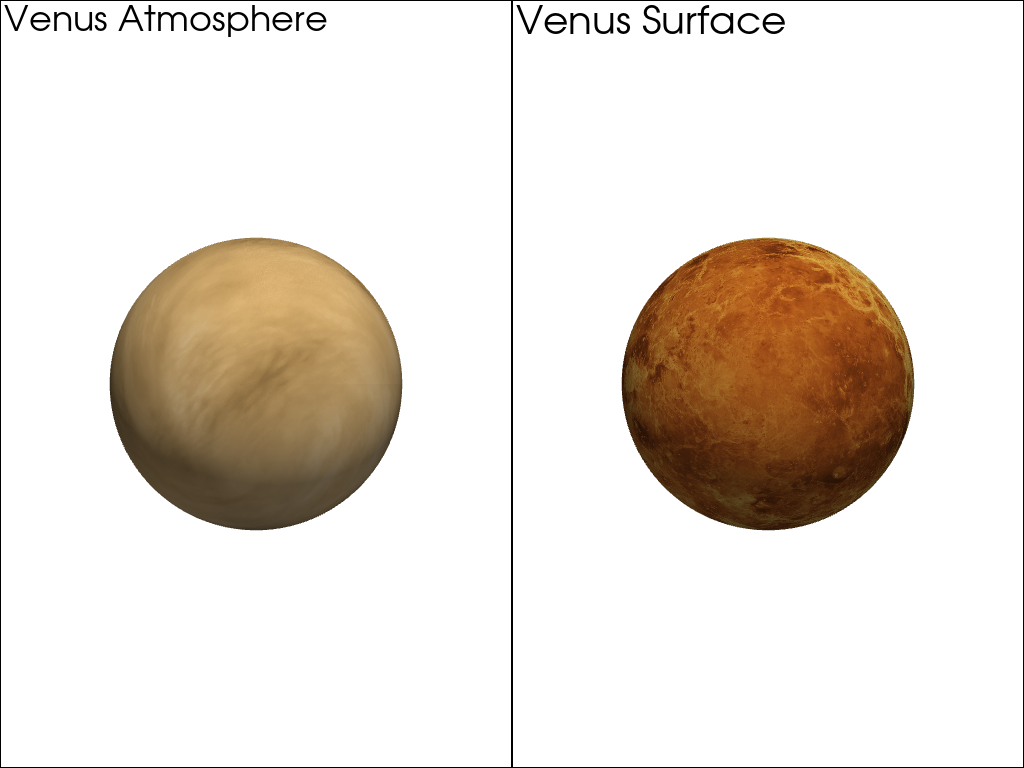

In [6]:
venus = examples.planets.load_venus()
atmosphere_texture = examples.planets.download_venus_surface(atmosphere=True, texture=True)
surface_texture = examples.planets.download_venus_surface(atmosphere=False, texture=True)

pl = pyvista.Plotter(shape=(1, 2))
pl.subplot(0, 0)
pl.add_text('Venus Atmosphere')
pl.add_mesh(venus, texture=atmosphere_texture, smooth_shading=True)
pl.subplot(0, 1)
pl.add_text('Venus Surface')
pl.add_mesh(venus, texture=surface_texture, smooth_shading=True)
pl.link_views()
pl.show(cpos='xy')